## Importar la base de datos, transformada en excel

Ya creamos la base, y la convertimos a excel, para esto eliminamos estas variables con el siguiente código: df_health = df_health.drop(columns=['Valor_Neto_Chunk','DIAS_ESTAN_Neto_Chunk']) ara esto vamos a volver la base de datos a formato csv y la vamos a guardar en la nube, sin estas variables.



In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import seaborn as sns

#David M Path:  
file_path = '/Users/davidmoreno/Library/CloudStorage/OneDrive-SharedLibraries-Universidaddelosandes/David Stiven Romero Grajales - Trabajo de Grado/Trabajo de Grado 1/Base de datos y descripción/Entrenamiento_cronicas_N.csv'


# #Normal path
# file_path = 'C:/Users/David/Universidad de los andes/David Stiven Romero Grajales - Trabajo de Grado/Trabajo de Grado 1/Base de datos y descripción/Entrenamiento_cronicas_N.pkl'
# try:
#     with open(file_path, 'rb') as file:
#         df_health = pickle.load(file)
# except Exception as e:
#     print(f"An error occurred: {e}")


df_health = pd.read_csv(file_path)



In [18]:
df_health.columns

Index(['EPS', 'NUM_IDE', 'FECHA_NACI', 'SEXO', 'DPTO', 'MUNI', 'DIAS_COMP',
       'V8', 'id', 'Valor_Neto', 'DIAS_ESTAN_Neto', 'Edad', 'SIDA_VIH',
       'TUBERCULOSIS', 'CANCER_OTROSCANCER', 'CANCER_ORGANOSDIGESTIVOS',
       'CANCER_ORGANOSRESPIRATORIOS', 'CANCER_MELANOMAYDELAPIEL',
       'CANCER_MAMA', 'CANCER_OTROSGENITALESFEMENINOS',
       'CANCER_CERVIXINVASIVO', 'CANCER_GENITALESMASCULINOS',
       'CANCER_TEJIDOLINFATICOYAFINES', 'CANCER_CERVIXINSITU', 'AUTOINMUNE',
       'DIABETES', 'SINDROMESCONVULSIVOS(EPILEPSIA)',
       'ENFERMEDADCARDIOVASCULAR_OTRA',
       'ENFERMEDADCARDIOVASCULAR_HIPERTENSION',
       'ENFERMEDADPULMONARDELARGADURACION', 'ASMA',
       'ARTRITISPIOGENASYREACTIVAS', 'ARTRITIS', 'ARTROSIS', 'RENAL_OTRA',
       'RENAL_RENALDELARGADURACION', 'TRANSPLANTE',
       'RENAL_INSUFICIENCIARENALOTRA', 'RENAL_INSUFICIENCIARENALCRONICA',
       'ANOMALIASGENETICASYCONGENITAS', 'CANCER_TERAPIACANCER', 'Grupo_Edad',
       'Zona'],
      dtype='object')

### Conversion de las variables a su respectiva categoria.

Limpiemos nuestra base, y convirtamos todas las columnas a su respectiva categoria, pera entrenar nuestos modelos y algoritmos.

In [19]:


# 1. EPS - Categorical
df_health['EPS'] = df_health['EPS'].astype('category')

# 2. NUM_IDE - Identifier, string
df_health['NUM_IDE'] = df_health['NUM_IDE'].astype(str)

# 3. FECHA_NACI - Convert to datetime
df_health['FECHA_NACI'] = pd.to_datetime(df_health['FECHA_NACI'], errors='coerce')

# 4. SEXO - Categorical
df_health['SEXO'] = df_health['SEXO'].astype('category')

# 5. DPTO - Categorical
df_health['DPTO'] = df_health['DPTO'].astype('category')

# 6. MUNI - Categorical
df_health['MUNI'] = df_health['MUNI'].astype('category')

# 7. DIAS_COMP - Numeric
df_health['DIAS_COMP'] = pd.to_numeric(df_health['DIAS_COMP'], errors='coerce')

# 8. V8 - Categorical
df_health['V8'] = df_health['V8'].astype('category')

df_health['Valor_Neto'] = pd.to_numeric(df_health['Valor_Neto'], errors='coerce')

# 11. DIAS_ESTAN_Neto_Chunk and DIAS_ESTAN_Neto - Numeric
df_health['DIAS_ESTAN_Neto'] = pd.to_numeric(df_health['DIAS_ESTAN_Neto'], errors='coerce')

# 12. Edad - Numeric
df_health['Edad'] = pd.to_numeric(df_health['Edad'], errors='coerce')

# 13. Illness Columns - Numeric (binary)
illness_columns = [
    'SIDA_VIH', 'TUBERCULOSIS', 'CANCER_OTROSCANCER', 'CANCER_ORGANOSDIGESTIVOS', 
    'CANCER_ORGANOSRESPIRATORIOS', 'CANCER_MELANOMAYDELAPIEL', 'CANCER_MAMA', 
    'CANCER_OTROSGENITALESFEMENINOS', 'CANCER_CERVIXINVASIVO', 'CANCER_GENITALESMASCULINOS', 
    'CANCER_TEJIDOLINFATICOYAFINES', 'CANCER_CERVIXINSITU', 'AUTOINMUNE', 'DIABETES', 
    'SINDROMESCONVULSIVOS(EPILEPSIA)', 'ENFERMEDADCARDIOVASCULAR_OTRA', 
    'ENFERMEDADCARDIOVASCULAR_HIPERTENSION', 'ENFERMEDADPULMONARDELARGADURACION', 
    'ASMA', 'ARTRITISPIOGENASYREACTIVAS', 'ARTRITIS', 'ARTROSIS', 'RENAL_OTRA', 
    'RENAL_RENALDELARGADURACION', 'TRANSPLANTE', 'RENAL_INSUFICIENCIARENALOTRA', 
    'RENAL_INSUFICIENCIARENALCRONICA', 'ANOMALIASGENETICASYCONGENITAS', 
    'CANCER_TERAPIACANCER'
]

df_health[illness_columns] = df_health[illness_columns].apply(pd.to_numeric, errors='coerce')

# 14. Grupo_Edad - Categorical
df_health['Grupo_Edad'] = df_health['Grupo_Edad'].astype('category')

# 15. Zona - Categorical
df_health['Zona'] = df_health['Zona'].astype('category')
print(df_health.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996234 entries, 0 to 996233
Data columns (total 43 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   EPS                                    996234 non-null  category      
 1   NUM_IDE                                996234 non-null  object        
 2   FECHA_NACI                             996234 non-null  datetime64[ns]
 3   SEXO                                   996234 non-null  category      
 4   DPTO                                   996234 non-null  category      
 5   MUNI                                   996234 non-null  category      
 6   DIAS_COMP                              996234 non-null  int64         
 7   V8                                     996234 non-null  category      
 8   id                                     996234 non-null  object        
 9   Valor_Neto                             996234 no

In [20]:
unique_ids = df_health['NUM_IDE'].nunique()
total_ids = len(df_health['NUM_IDE'])
print(f"Unique NUM_IDE: {unique_ids} out of {total_ids} total entries.")


Unique NUM_IDE: 995072 out of 996234 total entries.


Ahora, buscamos ver la cantidad de valores nulos en nuestros datos, y en las variables de one-hot encoding, ver la cantidad de 0 y 1 para ver la distribución de los datos

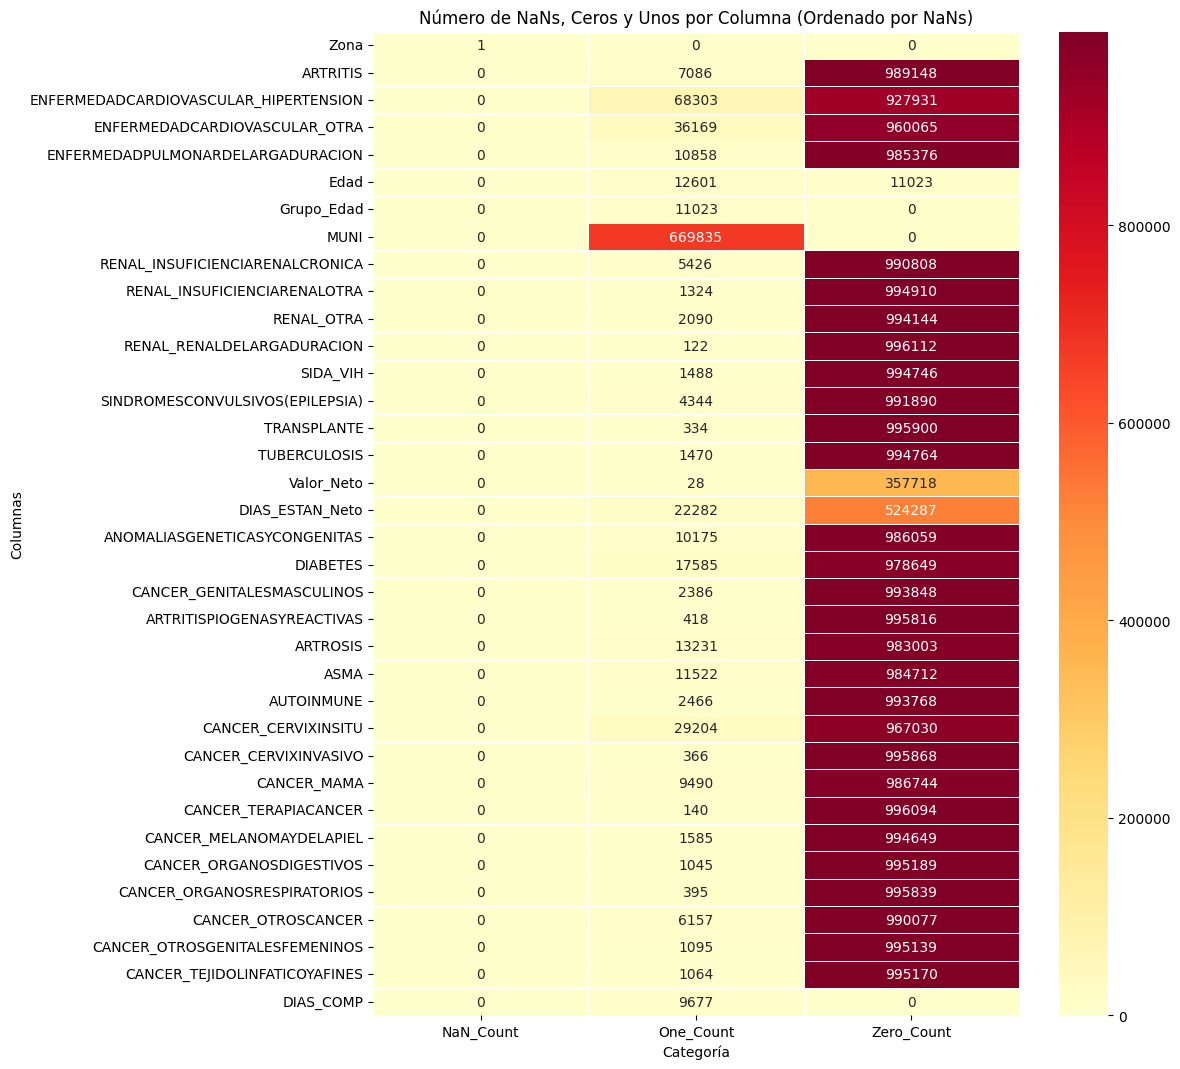

In [21]:
# 1. Calcular los conteos de NaNs, ceros y unos
nan_counts = df_health.isna().sum()
zero_counts = (df_health == 0).sum()
one_counts = (df_health == 1).sum()

cleaning_summary = pd.DataFrame({
    'NaN_Count': nan_counts,
    'Zero_Count': zero_counts,
    'One_Count': one_counts
})

# Filtrar columnas relevantes
cleaning_summary = cleaning_summary[
    (cleaning_summary['NaN_Count'] > 0) |
    (cleaning_summary['Zero_Count'] > 0) |
    (cleaning_summary['One_Count'] > 0)
]

cleaning_summary = cleaning_summary.reset_index().rename(columns={'index': 'Column'})

# 2. Preparar los datos para el heatmap
cleaning_melted = cleaning_summary.melt(id_vars='Column', 
                                       value_vars=['NaN_Count', 'Zero_Count', 'One_Count'],
                                       var_name='Category', 
                                       value_name='Count')

heatmap_data = cleaning_melted.pivot(index='Column', columns='Category', values='Count')

# Opcional: Ordenar las columnas por número de NaNs
heatmap_data_sorted = heatmap_data.sort_values(by='NaN_Count', ascending=False)

# 3. Crear el heatmap
plt.figure(figsize=(12, max(8, len(heatmap_data_sorted) * 0.3)))

sns.heatmap(heatmap_data_sorted, annot=True, fmt='d', cmap='YlOrRd', linewidths=.5)

plt.title('Número de NaNs, Ceros y Unos por Columna (Ordenado por NaNs)')
plt.xlabel('Categoría')
plt.ylabel('Columnas')

plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Aqui como vemos hay un problema bastante grande a la hora de predecir nuestra variable respuesta. Los datos de las enfermedades casi todos son 0, esto quiere decir que en nuestra base de datos, casi no hay enfermedades y ahora pedirle al modelo que intente predecir el valor que le cuesta al estado un paciente en el sistema de salud, dadas estas enfermedades va a ser un poco complejo.

### Reducción de la dimensionalidad

Vemos que nuestros datos tienen muchas columnas, pero como vemos muchas de estas columnas no tinen mucha información que pueda ser de interes para nuestro modelo. Para esto vamos a Utilizar PCA para reducir nuestra matriz y encontrar las variables que maximizan la varianza de nuestros datos, y asi solo elegir esas.

Original Training Shape: (510812, 42)
Reduced Training Shape after PCA: (510812, 34)
Original Testing Shape: (127704, 42)
Reduced Testing Shape after PCA: (127704, 34)


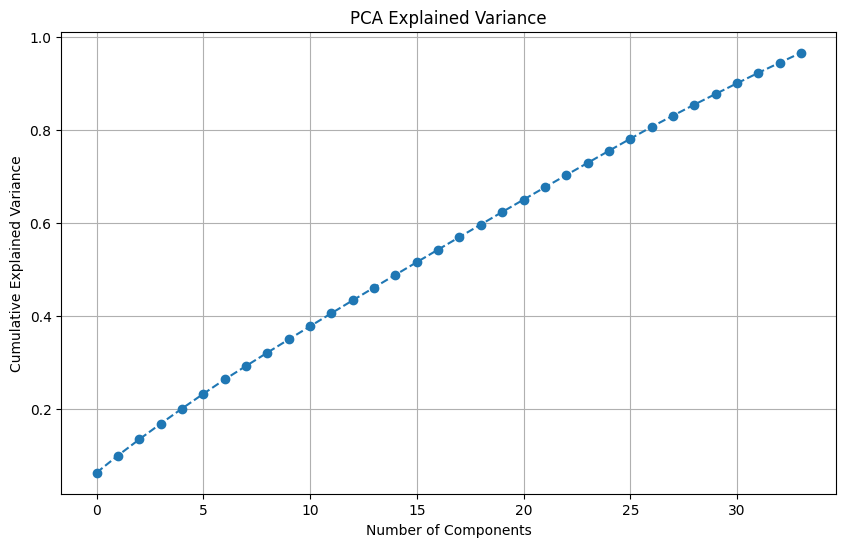

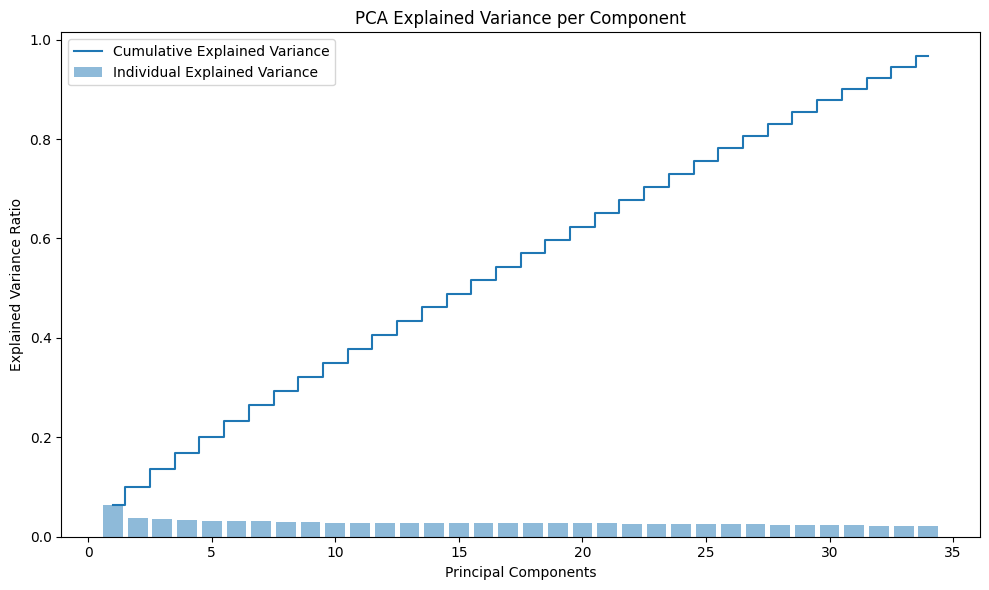

In [60]:
import pandas as pd
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df_health = df_health[df_health['Valor_Neto']!=0]


# 2. Convert specified columns to 'category' dtype
categorical_columns = ['EPS', 'SEXO', 'DPTO', 'MUNI']
for col in categorical_columns:
    df_health[col] = df_health[col].astype('category')

# 3. Define target and features
target = 'Valor_Neto'
identifier_columns = ['NUM_IDE']  # Update based on your DataFrame
feature_columns = [col for col in df_health.columns if col not in [target] ]

X = df_health[feature_columns]
y = df_health[target]

# 4. Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Identify numerical columns (excluding target and identifier)
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in identifier_columns]

# 6. Define the preprocessing steps
# Define the preprocessing pipeline for categorical columns
categorical_pipeline = Pipeline(steps=[
    ('target_enc', ce.TargetEncoder(cols=categorical_columns, smoothing=10)),
    ('scaler', StandardScaler())
])

# Define the preprocessing pipeline for numerical columns
numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine both pipelines into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_pipeline, categorical_columns),
        ('num', numerical_pipeline, numeric_cols)
    ],
    remainder='drop'  # This drops any columns not specified in transformers
)


# 7. Define the PCA step
pca = PCA(n_components=0.95, random_state=42)  # Retain 80% of the variance

# 8. Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', pca)
])

# 9. Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# 10. Transform the training and testing data
X_train_pca = pipeline.transform(X_train)
X_test_pca = pipeline.transform(X_test)

# 11. Check the shapes
print(f"Original Training Shape: {X_train.shape}")
print(f"Reduced Training Shape after PCA: {X_train_pca.shape}")
print(f"Original Testing Shape: {X_test.shape}")
print(f"Reduced Testing Shape after PCA: {X_test_pca.shape}")

# 12. Visualize the explained variance
# Access the PCA object from the pipeline
pca_steps = pipeline.named_steps['pca']

# Plot the cumulative explained variance
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca_steps.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()

# Plot individual and cumulative explained variance
plt.figure(figsize=(10,6))
plt.bar(range(1, len(pca_steps.explained_variance_ratio_) + 1), pca_steps.explained_variance_ratio_, alpha=0.5, align='center',
        label='Individual Explained Variance')
plt.step(range(1, len(np.cumsum(pca_steps.explained_variance_ratio_)) +1 ), np.cumsum(pca_steps.explained_variance_ratio_), where='mid',
         label='Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance per Component')
plt.legend(loc='best')
plt.tight_layout()
plt.show()





### Componentes Principales del PCA

In [61]:
# Acceder al objeto PCA dentro del pipeline
pca = pipeline.named_steps['pca']

# Obtener la varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_

# Obtener las componentes principales
components = pca.components_

# Número total de componentes en el PCA
total_components = pca.n_components_

print(f"Total de Componentes: {total_components}")
print(f"Varianza Explicada por cada Componente: {explained_variance}")


Total de Componentes: 34
Varianza Explicada por cada Componente: [0.06387797 0.03679705 0.0347834  0.03352833 0.0326236  0.03168618
 0.03092403 0.02890124 0.02874756 0.02842441 0.02819166 0.02804721
 0.02776137 0.02756026 0.02728813 0.02714872 0.02706707 0.02696548
 0.0269455  0.02681943 0.0266037  0.02647222 0.02628925 0.02614865
 0.02598331 0.02592702 0.02562973 0.02407853 0.02368481 0.0229664
 0.02291909 0.02250468 0.02169169 0.02147189]


In [62]:
# 13. Extract PCA Components and Feature Loadings

# Extract the PCA step from the pipeline
pca = pipeline.named_steps['pca']

# Get the PCA components
components = pca.components_

# Get feature names after preprocessing
feature_names = categorical_columns + numeric_cols

# Create a DataFrame for the loadings of PC1 and PC2
loadings = pd.DataFrame({
    'Feature': feature_names,
    'PC1': components[0],
    'PC2': components[1]
})

# Compute the loading magnitude (Euclidean distance from origin)
loadings['PC1_Magnitude'] = loadings['PC1'].abs()
loadings['PC2_Magnitude'] = loadings['PC2'].abs()
loadings['Total_Magnitude'] = loadings['PC1_Magnitude'] + loadings['PC2_Magnitude']

# Display the loadings
print(loadings)


                                  Feature       PC1       PC2  PC1_Magnitude  \
0                                     EPS  0.115390 -0.016357       0.115390   
1                                    SEXO  0.058627  0.547902       0.058627   
2                                    DPTO  0.034468 -0.002007       0.034468   
3                                    MUNI  0.015213 -0.004455       0.015213   
4                               DIAS_COMP  0.176133  0.053486       0.176133   
5                         DIAS_ESTAN_Neto  0.315175 -0.039673       0.315175   
6                                    Edad  0.474936  0.069844       0.474936   
7                                SIDA_VIH  0.004708 -0.053690       0.004708   
8                            TUBERCULOSIS  0.035715 -0.014149       0.035715   
9                      CANCER_OTROSCANCER  0.106316  0.088075       0.106316   
10               CANCER_ORGANOSDIGESTIVOS  0.075916  0.020721       0.075916   
11            CANCER_ORGANOSRESPIRATORIO

In [51]:
# Define the number of top features to display
N = 10

# Sort the loadings by total magnitude and select top N features
top_loadings = loadings.sort_values(by='Total_Magnitude', ascending=False).head(N)

print("Top 10 Features Contributing to PC1 and PC2:")
print(top_loadings[['Feature', 'PC1', 'PC2', 'Total_Magnitude']])


Top 10 Features Contributing to PC1 and PC2:
                                  Feature           PC1           PC2  \
3                                    MUNI  9.964676e-01 -5.130688e-02   
0                                     EPS  3.797060e-02  9.813581e-01   
2                                    DPTO  7.490249e-02  1.851105e-01   
1                                    SEXO -3.801889e-04  6.168300e-03   
6                                    Edad  8.965454e-08  1.819271e-06   
23  ENFERMEDADCARDIOVASCULAR_HIPERTENSION  4.813217e-08  8.917957e-07   
33        RENAL_INSUFICIENCIARENALCRONICA  2.328907e-08  5.703416e-07   
20                               DIABETES  6.125711e-08  4.512731e-07   
5                         DIAS_ESTAN_Neto  2.869992e-08  4.368138e-07   
34          ANOMALIASGENETICASYCONGENITAS -1.572863e-08 -3.921350e-07   

    Total_Magnitude  
3      1.047774e+00  
0      1.019329e+00  
2      2.600130e-01  
1      6.548489e-03  
6      1.908925e-06  
23     9.399278e-07

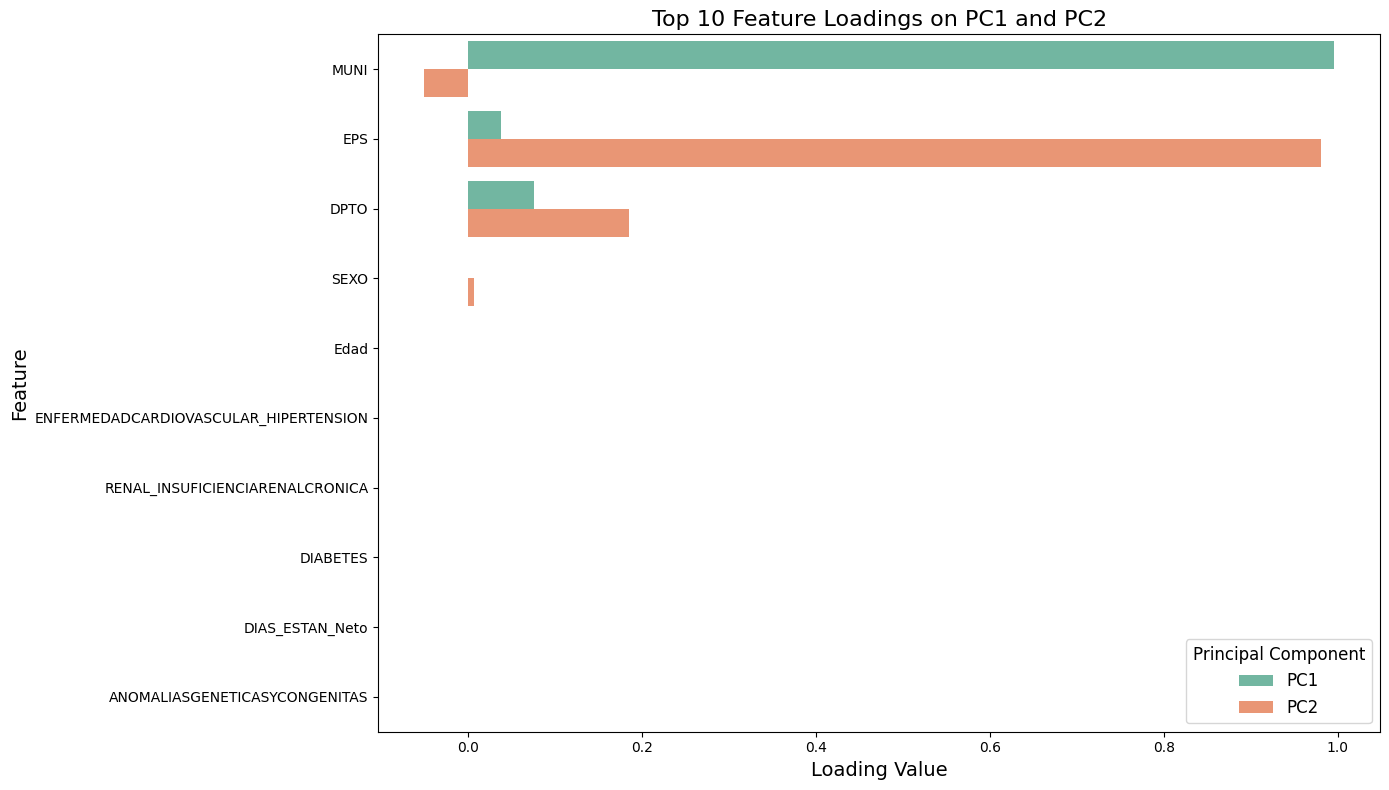

In [63]:
# 15. Bar Plot of Feature Loadings

# Melt the loadings DataFrame for easier plotting
melted_loadings = top_loadings.melt(
    id_vars=['Feature'],
    value_vars=['PC1', 'PC2'],
    var_name='Principal Component',
    value_name='Loading'
)

plt.figure(figsize=(14, 8))
sns.barplot(
    x='Loading',
    y='Feature',
    hue='Principal Component',
    data=melted_loadings,
    palette='Set2'
)

plt.title('Top 10 Feature Loadings on PC1 and PC2', fontsize=16)
plt.xlabel('Loading Value', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.legend(title='Principal Component', fontsize=12, title_fontsize=12)
plt.tight_layout()
plt.show()


In [64]:
# 16. Interactive Feature Loadings Plot with Plotly

import plotly.express as px

# Create a DataFrame for feature loadings
feature_loadings = top_loadings[['Feature', 'PC1', 'PC2']]

# Create an interactive scatter plot for feature loadings
fig = px.scatter(
    feature_loadings,
    x='PC1',
    y='PC2',
    text='Feature',
    title='Top 10 Feature Loadings on PC1 and PC2',
    labels={
        'PC1': 'Principal Component 1',
        'PC2': 'Principal Component 2'
    },
    hover_data=['Feature', 'PC1', 'PC2']
)

# Add arrows manually as shapes (Plotly doesn't support arrows directly)
for _, row in feature_loadings.iterrows():
    fig.add_shape(
        type="line",
        x0=0, y0=0,
        x1=row['PC1'], y1=row['PC2'],
        line=dict(color='Red', width=2)
    )

# Update text positions
fig.update_traces(textposition='top center')

# Update layout for better visuals
fig.update_layout(
    showlegend=False,
    width=800,
    height=600
)

fig.show()


In [75]:
X

,EPS,NUM_IDE,FECHA_NACI,SEXO,DPTO,MUNI,DIAS_COMP,V8,id,DIAS_ESTAN_Neto,...,ARTROSIS,RENAL_OTRA,RENAL_RENALDELARGADURACION,TRANSPLANTE,RENAL_INSUFICIENCIARENALOTRA,RENAL_INSUFICIENCIARENALCRONICA,ANOMALIASGENETICASYCONGENITAS,CANCER_TERAPIACANCER,Grupo_Edad,Zona
0,EPS002,7B7119A8-7D83-4DAF-ABC9-D33642AF26FD,1999-05-14,F,50,1,360,B,EPS002-7B7119A8-7D83-4DAF-ABC9-D33642AF26FD,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,N
1,EPS013,D36643BD-6CCC-4608-94D8-6B167B226CB5,1988-08-12,M,76,1,336,C,EPS013-D36643BD-6CCC-4608-94D8-6B167B226CB5,277.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,C
2,EPS017,919EBF57-FA41-4DD2-AF8A-CB237B47685E,1996-03-15,F,11,1,333,B,EPS017-919EBF57-FA41-4DD2-AF8A-CB237B47685E,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,C
5,EPS018,94C3AE95-6F43-4F4A-BAB8-3C13AB1CCDDB,2007-10-03,F,76,1,360,B,EPS018-94C3AE95-6F43-4F4A-BAB8-3C13AB1CCDDB,130.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,C
7,EPS016,BB9AAEC4-3952-4AE1-BA59-0E62E3E26B0B,1958-08-23,M,8,1,360,C,EPS016-BB9AAEC4-3952-4AE1-BA59-0E62E3E26B0B,2495.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996224,EPS005,08C6AA89-CAD1-4F66-B7DF-AD7B00DE798D,2002-08-30,F,15,176,109,B,EPS005-08C6AA89-CAD1-4F66-B7DF-AD7B00DE798D,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,N
996226,EPS037,E0D2BF8C-7E54-4B67-844E-7B4287FA1091,1957-10-16,F,68,755,360,B,EPS037-E0D2BF8C-7E54-4B67-844E-7B4287FA1091,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,N
996227,EPS005,A3A16955-7AE6-45BE-8232-B368ABD7A0AC,1970-10-26,M,25,754,24,B,EPS005-A3A16955-7AE6-45BE-8232-B368ABD7A0AC,200.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,C
996229,EPS005,6A239F21-AE92-4681-BC47-F070C899B960,1980-08-17,M,88,1,360,C,EPS005-6A239F21-AE92-4681-BC47-F070C899B960,35.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,Z


In [74]:
import numpy as np

# Transform the features using the fitted preprocessor
X_processed = preprocessor.transform(X)

# Get the names of the transformed features
# Note: TargetEncoder replaces each categorical column with a single numerical column
processed_feature_names = categorical_columns + numeric_cols

# Create the preprocessed DataFrame
df_health_1 = pd.DataFrame(X_processed, columns=processed_feature_names)

# Add the target variable back to the preprocessed DataFrame
df_health_1[target] = y.values

Y_processed = preprocessor.transform(y)

# Optionally, include the identifier if needed
# df_health_1[identifier_columns] = df_health[identifier_columns].values

file_path = '/Users/davidmoreno/Library/CloudStorage/OneDrive-SharedLibraries-Universidaddelosandes/David Stiven Romero Grajales - Trabajo de Grado/Trabajo de Grado 1/Base de datos y descripción/Entrenamiento_cronicas_N.csv'


# Display the first few rows of the new DataFrame
#df_health_1.to_csv('/Users/davidmoreno/Library/CloudStorage/OneDrive-SharedLibraries-Universidaddelosandes/David Stiven Romero Grajales - Trabajo de Grado/Trabajo de Grado 1/Base de datos y descripción/Entrenamiento_cronicas_N_Standarized.csv', index=False)

ValueError: X does not contain any features, but ColumnTransformer is expecting 42 features

In [76]:
# Import Necessary Libraries
import pandas as pd
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib


# 3. Define target and features
target = 'Valor_Neto'
feature_columns = [col for col in df_health.columns if col not in [target] ]

X = df_health[feature_columns]
y = df_health[target]

# 4. Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Identify numerical columns (excluding target and identifier)
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in identifier_columns]

# 6. Define the preprocessing steps
categorical_pipeline = Pipeline(steps=[
    ('target_enc', ce.TargetEncoder(cols=categorical_columns, smoothing=10)),
    ('scaler', StandardScaler())
])

# Define the preprocessing pipeline for numerical columns
numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine both pipelines into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_pipeline, categorical_columns),
        ('num', numerical_pipeline, numeric_cols)
    ],
    remainder='drop'  # This drops any columns not specified in transformers
)

# 7. Define the PCA step
pca = PCA(n_components=0.95, random_state=42)  # Retain 95% of the variance

# 8. Create the pipeline
pipeline_with_pca = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', pca),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

pipeline_without_pca = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# 9. Train both models
pipeline_with_pca.fit(X_train, y_train)
pipeline_without_pca.fit(X_train, y_train)

# 10. Make predictions
y_pred_with_pca = pipeline_with_pca.predict(X_test)
y_pred_without_pca = pipeline_without_pca.predict(X_test)

# 11. Evaluate both models
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"{model_name} Performance:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.2f}")
    print('-' * 50)

# Evaluate Random Forest WITHOUT PCA
evaluate_model(y_test, y_pred_without_pca, "Random Forest WITHOUT PCA")

# Evaluate Random Forest WITH PCA
evaluate_model(y_test, y_pred_with_pca, "Random Forest WITH PCA")



Random Forest WITHOUT PCA Performance:
MAE: 197720.86
MSE: 13052055899566.92
RMSE: 3612762.92
R²: -17.42
--------------------------------------------------
Random Forest WITH PCA Performance:
MAE: 191128.28
MSE: 634981733447.05
RMSE: 796857.41
R²: 0.10
--------------------------------------------------


In [8]:
# Import necessary libraries
import pandas as pd
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Input, Add
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Categorical and numerical columns as per the user's request
categorical_columns = ['EPS', 'MUNI', 'DPTO', 'SEXO']
numeric_cols = ['DIAS_COMP', 'Edad', 'ENFERMEDADCARDIOVASCULAR_HIPERTENSION', 
                'DIAS_ESTAN_Neto', 'DIABETES', 'ENFERMEDADCARDIOVASCULAR_OTRA']

# Define the target variable
target = 'Valor_Neto'

# Split the dataset into features (X) and target (y)
X = df_health[categorical_columns + numeric_cols]
y = df_health[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the preprocessor using TargetEncoder for categorical columns and StandardScaler for numeric columns
preprocessor = ColumnTransformer(
    transformers=[
        ('target_enc', ce.TargetEncoder(cols=categorical_columns, smoothing=10), categorical_columns),
        ('scaler', StandardScaler(), numeric_cols)
    ],
    remainder='drop'  # This drops any columns not specified in transformers
)

# Apply the preprocessor to the training and testing data
X_train_processed = preprocessor.fit_transform(X_train, y_train)
X_test_processed = preprocessor.transform(X_test)

def build_complex_model(input_dim):
    # Input layer
    inputs = Input(shape=(input_dim,))
    
    # First hidden layer
    x = Dense(512, kernel_regularizer=l2(0.01))(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.3)(x)
    
    # Second hidden layer with residual connection
    x_res = Dense(512, kernel_regularizer=l2(0.01))(x)
    x_res = BatchNormalization()(x_res)
    x_res = Activation('relu')(x_res)
    x_res = Dropout(0.3)(x_res)
    
    # Adding the first layer and the residual layer
    x = Add()([x, x_res])
    
    # Third hidden layer
    x = Dense(256, kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.3)(x)
    
    # Output layer
    outputs = Dense(1, activation='linear')(x)
    
    # Creating the model
    model = Model(inputs=inputs, outputs=outputs)
    
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
    
    return model

# Assuming 'input_dim' is defined and other parts of the data pipeline are already in place
model = build_complex_model(input_dim)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Model training
history = model.fit(X_train_processed, y_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[early_stopping, lr_scheduler], verbose=1)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Progression')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Make predictions on the test data
y_pred = model.predict(X_test_processed)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Advanced Neural Network Model Performance:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


c:\Users\David\anaconda3\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\David\anaconda3\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\David\anaconda3\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and wil

Epoch 1/200


c:\Users\David\anaconda3\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\David\anaconda3\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)


19925/19925 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - loss: 62275415179264.0000 - mean_absolute_error: 203717.3594 - val_loss: 574966726656.0000 - val_mean_absolute_error: 183070.5469 - learning_rate: 0.0010
Epoch 2/200
19925/19925 ━━━━━━━━━━━━━━━━━━━━ 45s 2ms/step - loss: 110906960773120.0000 - mean_absolute_error: 206542.7656 - val_loss: 556246761472.0000 - val_mean_absolute_error: 196853.0156 - learning_rate: 0.0010
Epoch 3/200
19925/19925 ━━━━━━━━━━━━━━━━━━━━ 45s 2ms/step - loss: 8585732947968.0000 - mean_absolute_error: 202357.4844 - val_loss: 552661155840.0000 - val_mean_absolute_error: 208278.9844 - learning_rate: 0.0010
Epoch 4/200
19925/19925 ━━━━━━━━━━━━━━━━━━━━ 45s 2ms/step - loss: 50623751913472.0000 - mean_absolute_error: 221072.2812 - val_loss: 995641655296.0000 - val_mean_absolute_error: 709513.6250 - learning_rate: 0.0010
Epoch 5/200
19925/19925 ━━━━━━━━━━━━━━━━━━━━ 45s 2ms/step - loss: 3760858071040.0000 - mean_absolute_error: 204041.2031 - val_loss: 550279970816.0000 - val_

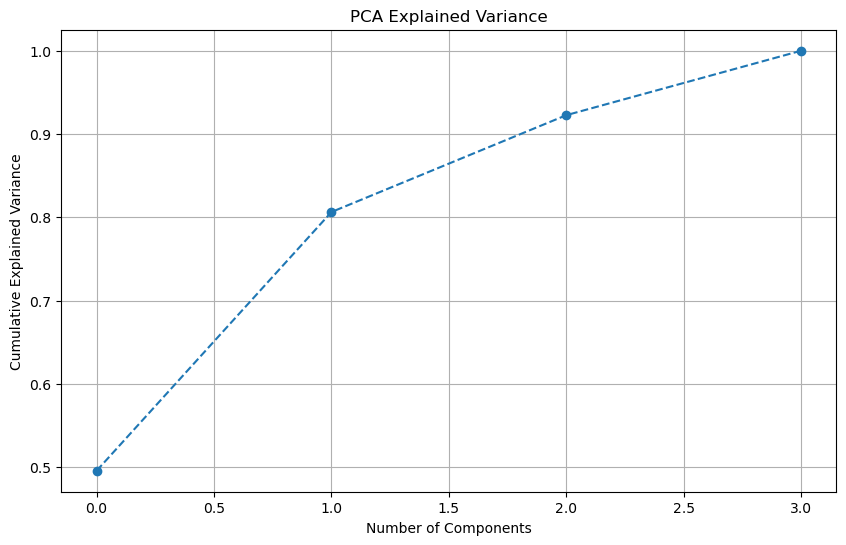

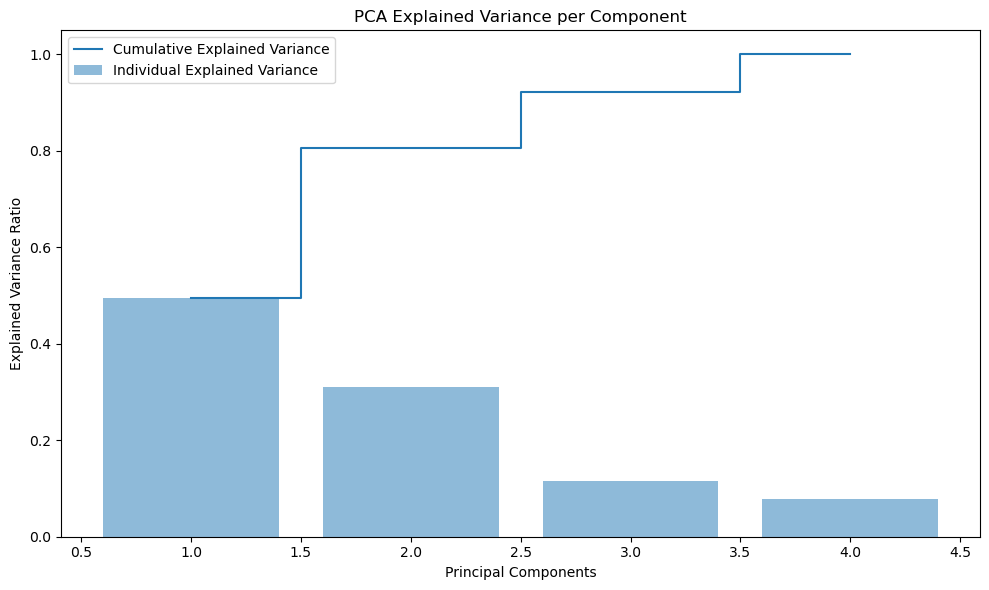

In [16]:

# 12. Visualize the explained variance of PCA
pca_steps = pipeline_with_pca.named_steps['pca']

plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca_steps.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
plt.bar(range(1, len(pca_steps.explained_variance_ratio_) + 1), pca_steps.explained_variance_ratio_, alpha=0.5, align='center',
        label='Individual Explained Variance')
plt.step(range(1, len(np.cumsum(pca_steps.explained_variance_ratio_)) +1 ), np.cumsum(pca_steps.explained_variance_ratio_), where='mid',
         label='Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance per Component')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Ahora queremos ver un análisis de correlación de los datos, qué variables no tienen ninguna información relevante para nuestro módelo? Miremos entonces la matriz de correlación para las variables númericas.

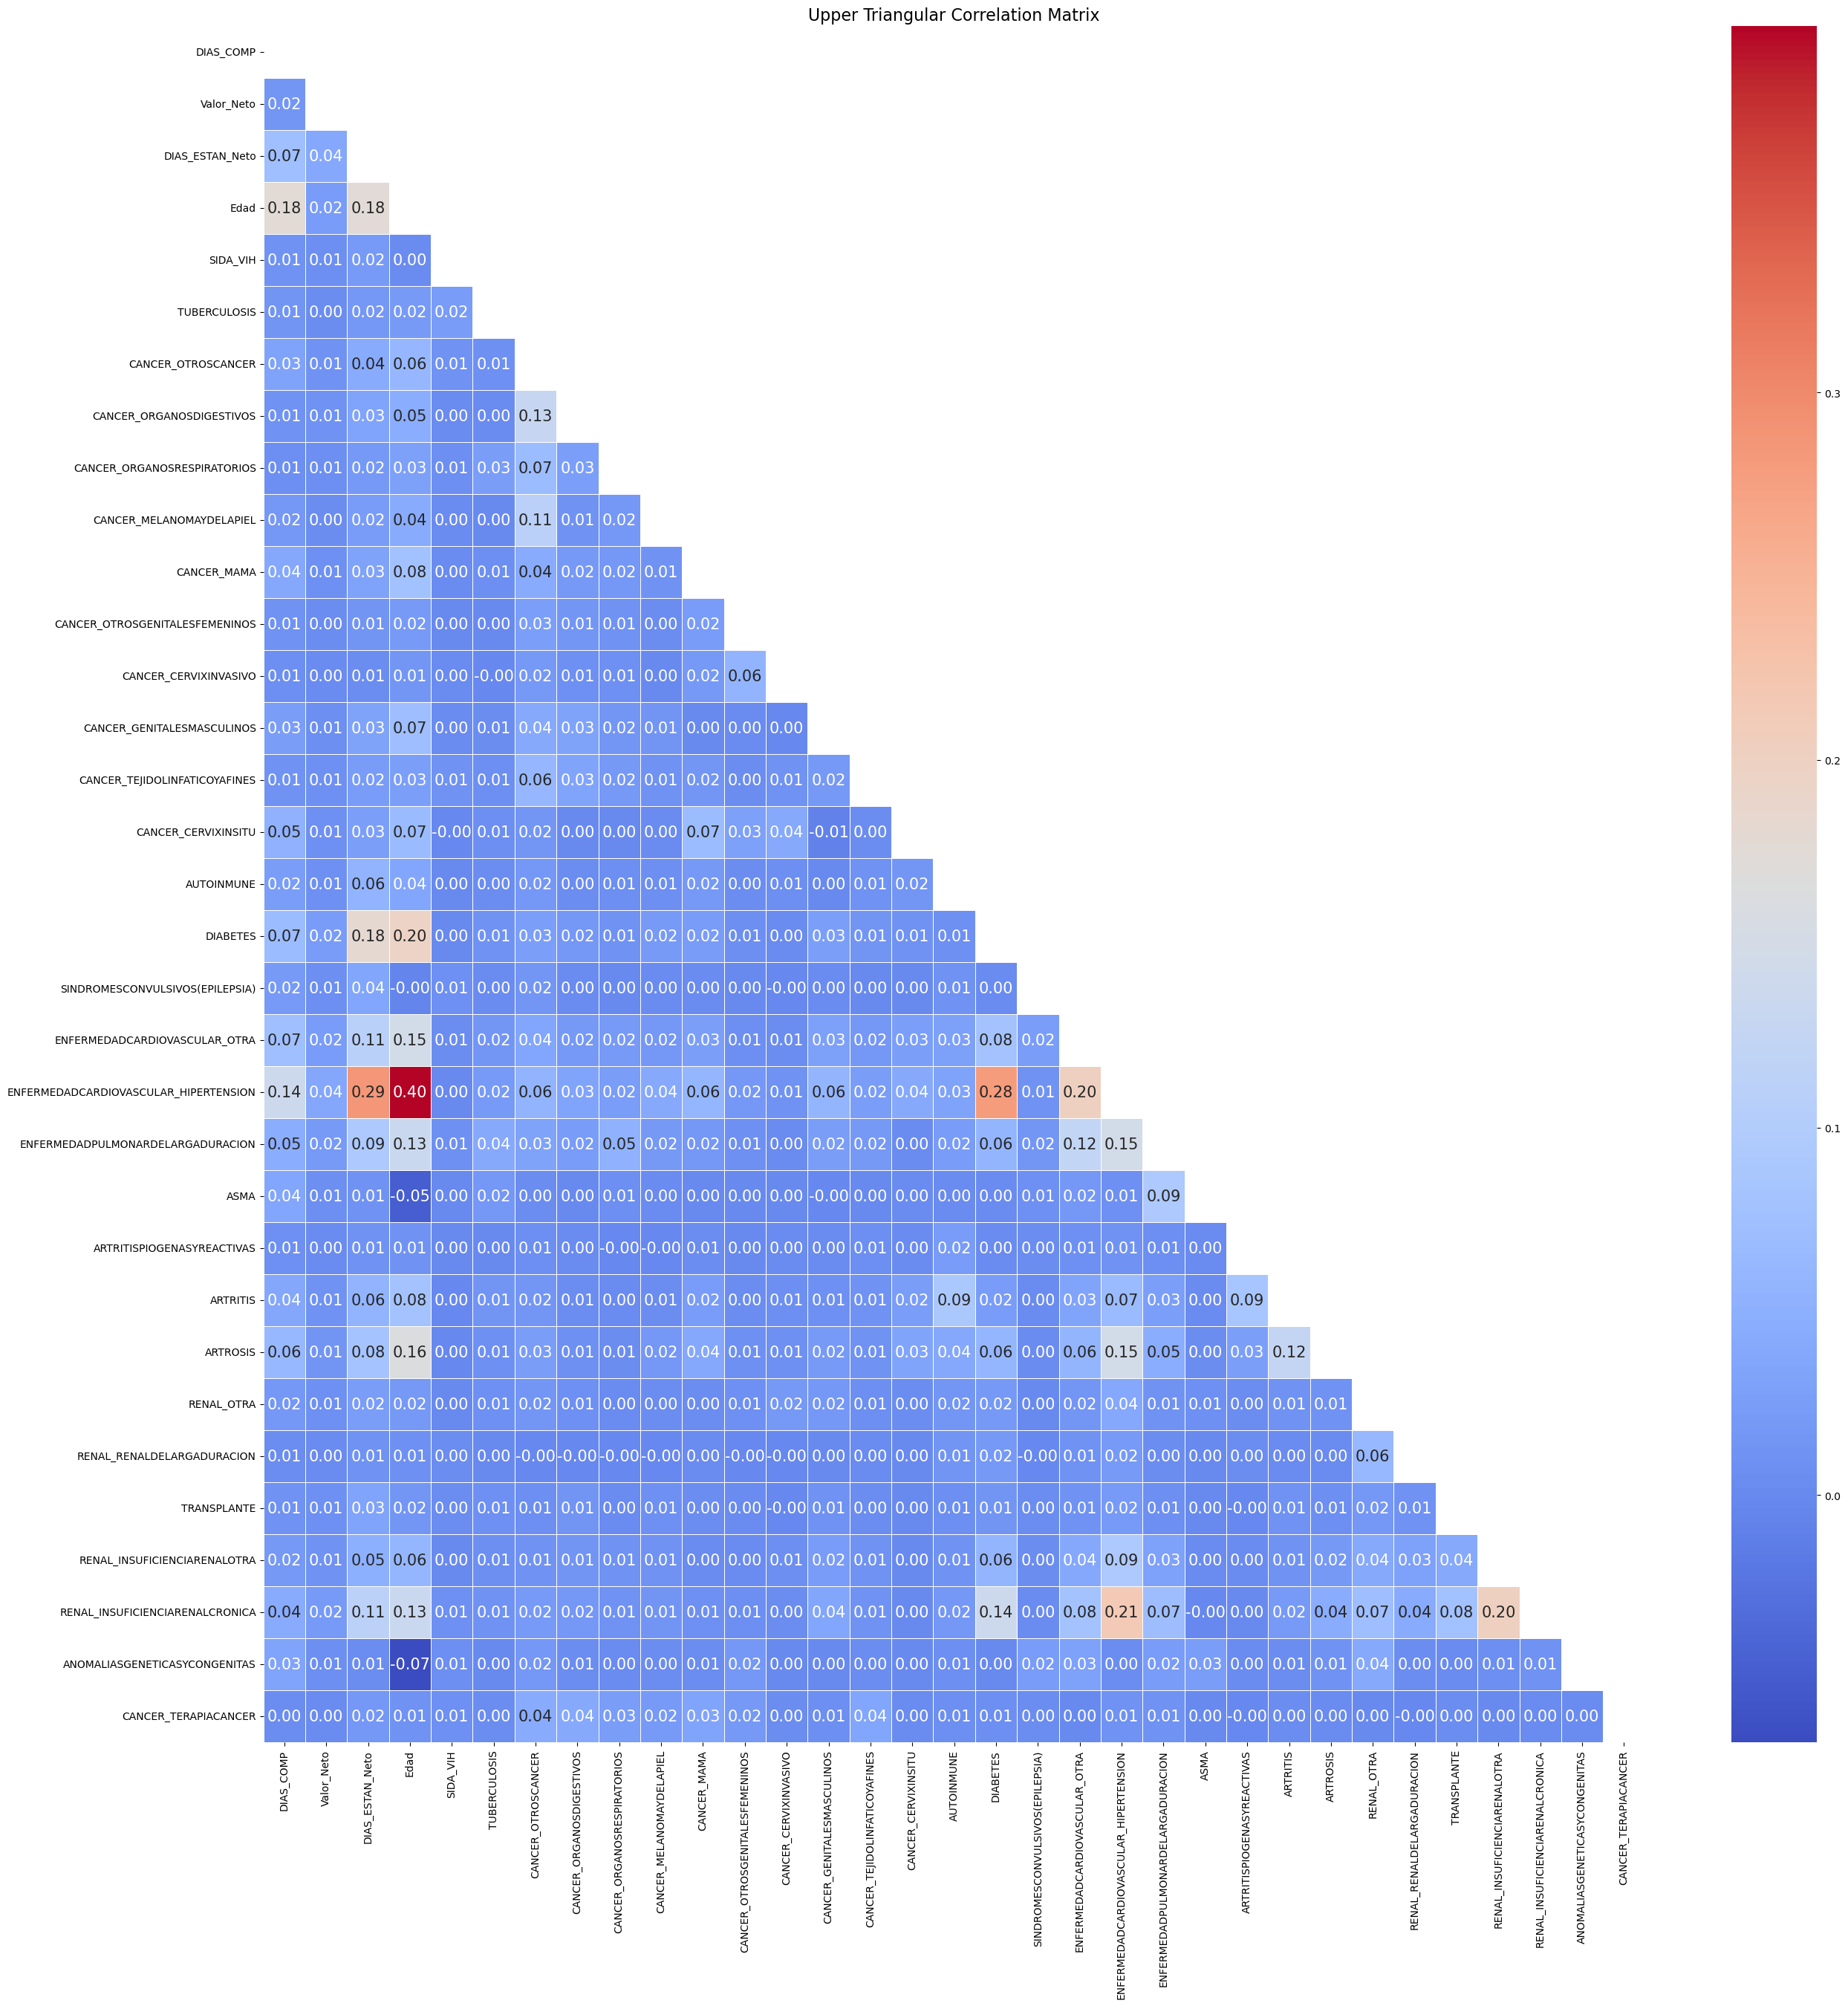

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select only numeric columns from the dataframe
numeric_df = df_health.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for numeric columns
corr_matrix = numeric_df.corr()

# Create a mask for the upper triangle (upper diagonal)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure with larger size
plt.figure(figsize=(30, 30))  # Increase figure size to make boxes bigger

# Draw the heatmap with the mask, hiding the lower triangle
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={"size": 15})

# Add title
plt.title('Upper Triangular Correlation Matrix', fontsize=16)

# Display the plot
plt.show()



In this graph, we observe some notable insights, while others are less significant. Our goal is to predict "Valor Neto," but the relationship with this variable does not appear to be linear, and there is minimal correlation with the other variables. This poses a challenge for inference, as it suggests that a linear model may not provide much explanatory power.

However, in the case of variables like "Edad," we do see correlations, particularly with "Hipertensión," which shows the highest value (in red). There are also notable correlations with other conditions like "Insuficiencia Renal" and "Artrosis." Additionally, the variable "días estas" shows correlations with certain diseases. On the positive side, most of the variables do not suffer from multicollinearity, which is good news for further analysis.

Valor_Neto                               1.000000
DIAS_ESTAN_Neto                          0.039998
ENFERMEDADCARDIOVASCULAR_HIPERTENSION    0.036712
ENFERMEDADCARDIOVASCULAR_OTRA            0.023683
DIABETES                                 0.023571
Edad                                     0.023390
ENFERMEDADPULMONARDELARGADURACION        0.021528
RENAL_INSUFICIENCIARENALCRONICA          0.020943
DIAS_COMP                                0.016189
ARTROSIS                                 0.013344
CANCER_OTROSCANCER                       0.011607
CANCER_ORGANOSDIGESTIVOS                 0.010927
RENAL_INSUFICIENCIARENALOTRA             0.010510
ARTRITIS                                 0.010473
CANCER_TEJIDOLINFATICOYAFINES            0.009233
CANCER_CERVIXINSITU                      0.008481
TRANSPLANTE                              0.008108
CANCER_MAMA                              0.007828
AUTOINMUNE                               0.007736
RENAL_OTRA                               0.007514


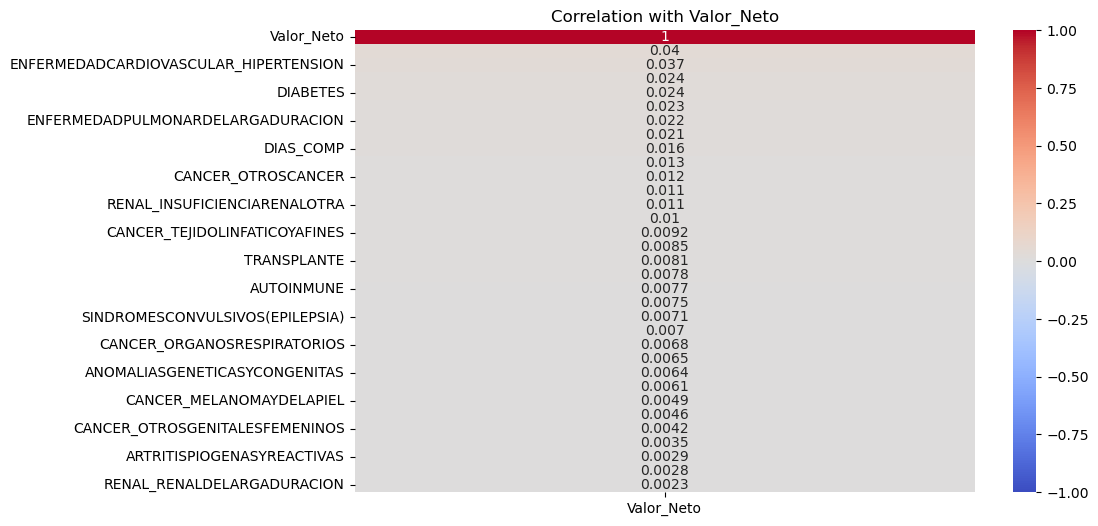

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting all numeric columns, including binary illness columns
illness_columns = [
    'SIDA_VIH', 'TUBERCULOSIS', 'CANCER_OTROSCANCER', 'CANCER_ORGANOSDIGESTIVOS', 
    'CANCER_ORGANOSRESPIRATORIOS', 'CANCER_MELANOMAYDELAPIEL', 'CANCER_MAMA', 
    'CANCER_OTROSGENITALESFEMENINOS', 'CANCER_CERVIXINVASIVO', 'CANCER_GENITALESMASCULINOS', 
    'CANCER_TEJIDOLINFATICOYAFINES', 'CANCER_CERVIXINSITU', 'AUTOINMUNE', 'DIABETES', 
    'SINDROMESCONVULSIVOS(EPILEPSIA)', 'ENFERMEDADCARDIOVASCULAR_OTRA', 
    'ENFERMEDADCARDIOVASCULAR_HIPERTENSION', 'ENFERMEDADPULMONARDELARGADURACION', 
    'ASMA', 'ARTRITISPIOGENASYREACTIVAS', 'ARTRITIS', 'ARTROSIS', 'RENAL_OTRA', 
    'RENAL_RENALDELARGADURACION', 'TRANSPLANTE', 'RENAL_INSUFICIENCIARENALOTRA', 
    'RENAL_INSUFICIENCIARENALCRONICA', 'ANOMALIASGENETICASYCONGENITAS', 
    'CANCER_TERAPIACANCER'
]

# Add other numeric variables of interest like 'Edad', 'DIAS_COMP', etc.
numeric_columns = ['Valor_Neto', 'Edad', 'DIAS_COMP', 'DIAS_ESTAN_Neto'] + illness_columns

# Filter only relevant numeric columns for analysis
df_numeric = df_health[numeric_columns]

# Calculate correlation only with 'Valor_Neto'
correlation_with_valor_neto = df_numeric.corr()['Valor_Neto'].sort_values(ascending=False)

# Display the correlations
print(correlation_with_valor_neto)

# Optionally, visualize the correlation with a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_with_valor_neto.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True)
plt.title('Correlation with Valor_Neto')
plt.show()


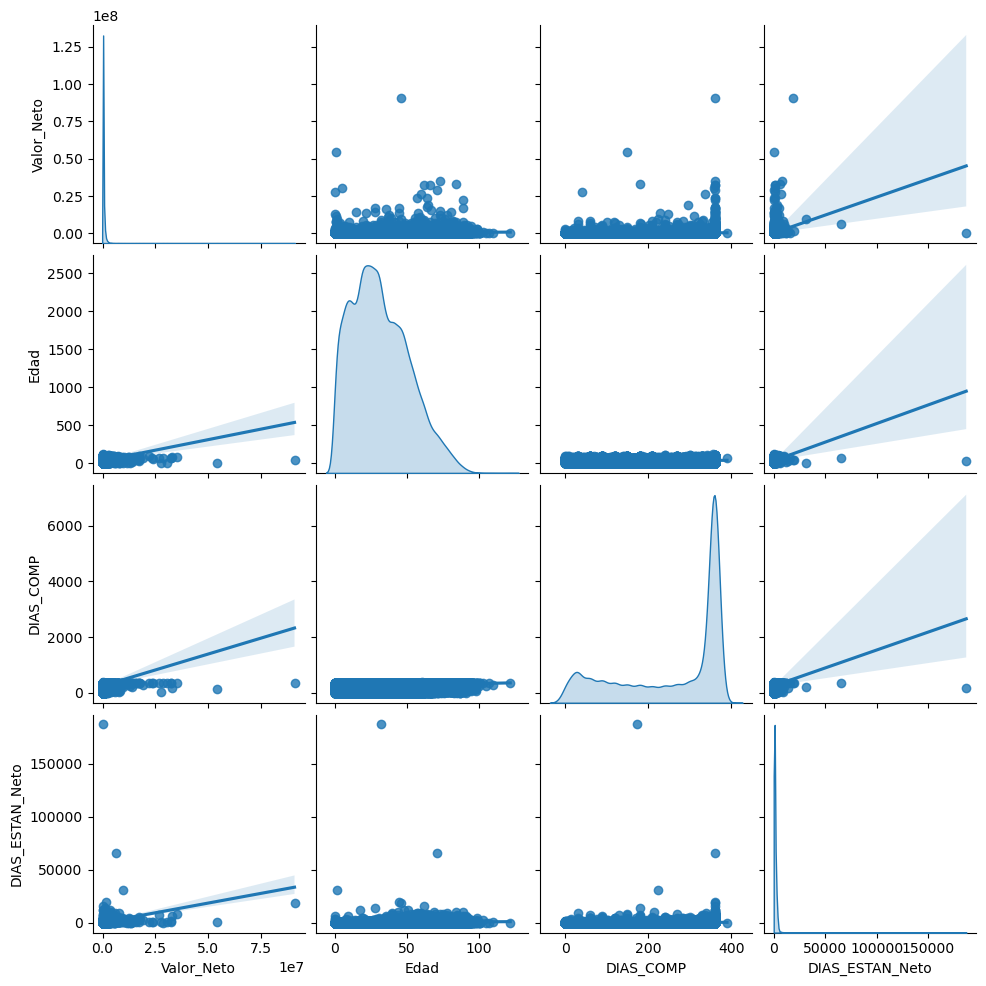

In [7]:
# Randomly sample 100,000 rows
numeric_columns = ['Valor_Neto', 'Edad', 'DIAS_COMP', 'DIAS_ESTAN_Neto']
df_sample = df_health[numeric_columns].sample(n=100000, random_state=42)

# Create the pairplot on the sampled data 
sns.pairplot(df_sample, kind="reg", diag_kind="kde")
plt.show()


# 3. Vamos a limpiar los datos

In [10]:
import pandas as pd

# List of binary illness columns
illness_columns = [
    'SIDA_VIH', 'TUBERCULOSIS', 'CANCER_OTROSCANCER', 'CANCER_ORGANOSDIGESTIVOS', 
    'CANCER_ORGANOSRESPIRATORIOS', 'CANCER_MELANOMAYDELAPIEL', 'CANCER_MAMA', 
    'CANCER_OTROSGENITALESFEMENINOS', 'CANCER_CERVIXINVASIVO', 'CANCER_GENITALESMASCULINOS', 
    'CANCER_TEJIDOLINFATICOYAFINES', 'CANCER_CERVIXINSITU', 'AUTOINMUNE', 'DIABETES', 
    'SINDROMESCONVULSIVOS(EPILEPSIA)', 'ENFERMEDADCARDIOVASCULAR_OTRA', 
    'ENFERMEDADCARDIOVASCULAR_HIPERTENSION', 'ENFERMEDADPULMONARDELARGADURACION', 
    'ASMA', 'ARTRITISPIOGENASYREACTIVAS', 'ARTRITIS', 'ARTROSIS', 'RENAL_OTRA', 
    'RENAL_RENALDELARGADURACION', 'TRANSPLANTE', 'RENAL_INSUFICIENCIARENALOTRA', 
    'RENAL_INSUFICIENCIARENALCRONICA', 'ANOMALIASGENETICASYCONGENITAS', 
    'CANCER_TERAPIACANCER'
]

# Add other numeric variables of interest like 'Edad', 'DIAS_COMP', etc.
numeric_columns = ['Valor_Neto', 'Edad', 'DIAS_COMP', 'DIAS_ESTAN_Neto'] + illness_columns

# Filter the dataframe to select only the specified columns
df_clean = df_health[numeric_columns]


,Valor_Neto,Edad,DIAS_COMP,DIAS_ESTAN_Neto,SIDA_VIH,TUBERCULOSIS,CANCER_OTROSCANCER,CANCER_ORGANOSDIGESTIVOS,CANCER_ORGANOSRESPIRATORIOS,CANCER_MELANOMAYDELAPIEL,...,ARTRITISPIOGENASYREACTIVAS,ARTRITIS,ARTROSIS,RENAL_OTRA,RENAL_RENALDELARGADURACION,TRANSPLANTE,RENAL_INSUFICIENCIARENALOTRA,RENAL_INSUFICIENCIARENALCRONICA,ANOMALIASGENETICASYCONGENITAS,CANCER_TERAPIACANCER
0,39054,12,360,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,312012,23,336,277,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14313,15,333,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,13,84,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,21,180,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996229,96085,31,360,35,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996230,0,47,215,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996231,0,30,30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996232,70114,32,360,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
import pandas as pd
from sklearn.ensemble import IsolationForest

# Lista de columnas numéricas para la limpieza de outliers
numeric_columns = ['Valor_Neto', 'Edad', 'DIAS_COMP', 'DIAS_ESTAN_Neto']

# Filtrar el dataframe para seleccionar solo las columnas que queremos limpiar
df_cleaned_outliers = df_health[numeric_columns].copy()

# Aplicar Isolation Forest para detectar outliers
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers = iso_forest.fit_predict(df_cleaned_outliers)

# Filtrar el dataframe y quedarnos solo con los puntos que no son outliers (outliers == 1)
df_cleaned_outliers = df_cleaned_outliers[outliers == 1]

# Mostrar las primeras filas del dataframe limpio de outliers
print(df_cleaned_outliers)




    Valor_Neto  Edad  DIAS_COMP  DIAS_ESTAN_Neto
3            0    13         84                0
4            0    21        180                0
6            0    32        360                0
9            0    30        282                0
21           0    21        240                0


In [23]:
df_cleaned_outliers

,Valor_Neto,Edad,DIAS_COMP,DIAS_ESTAN_Neto
3,0,13,84,0
4,0,21,180,0
6,0,32,360,0
9,0,30,282,0
21,0,21,240,0
...,...,...,...,...
996225,0,12,270,0
996228,0,0,50,0
996230,0,47,215,0
996231,0,30,30,0


Pipeline de limpieza

In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

numeric_columns = ['DIAS_COMP', 'DIAS_ESTAN_Neto', 'Edad']

model = LinearRegression()

for col in numeric_columns:
    X = df_health[[col]]  
    y = df_health['Valor_Neto']  
    model.fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    print(f'R² for {col}: {r2}')


R² for DIAS_COMP: 0.00026207309567338744
R² for DIAS_ESTAN_Neto: 0.001599841547789027
R² for Edad: 0.0005470810611043486


In [19]:
df_health_clean = df_health.dropna(subset=['SEXO', 'DPTO', 'Zona', 'Grupo_Edad'])


In [55]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import pandas as pd

# List of categorical, illness, and numeric columns
categorical_columns = ['SEXO', 'DPTO', 'Zona', 'Grupo_Edad']
illness_columns = ['SIDA_VIH', 'TUBERCULOSIS', 'CANCER_OTROSCANCER', 'CANCER_ORGANOSDIGESTIVOS', 
                   'CANCER_ORGANOSRESPIRATORIOS', 'CANCER_MELANOMAYDELAPIEL', 'CANCER_MAMA', 
                   'CANCER_OTROSGENITALESFEMENINOS', 'CANCER_CERVIXINVASIVO', 'CANCER_GENITALESMASCULINOS', 
                   'CANCER_TEJIDOLINFATICOYAFINES', 'CANCER_CERVIXINSITU', 'AUTOINMUNE', 'DIABETES', 
                   'SINDROMESCONVULSIVOS(EPILEPSIA)', 'ENFERMEDADCARDIOVASCULAR_OTRA', 
                   'ENFERMEDADCARDIOVASCULAR_HIPERTENSION', 'ENFERMEDADPULMONARDELARGADURACION', 
                   'ASMA', 'ARTRITISPIOGENASYREACTIVAS', 'ARTRITIS', 'ARTROSIS', 'RENAL_OTRA', 
                   'RENAL_RENALDELARGADURACION', 'TRANSPLANTE', 'RENAL_INSUFICIENCIARENALOTRA', 
                   'RENAL_INSUFICIENCIARENALCRONICA', 'ANOMALIASGENETICASYCONGENITAS', 
                   'CANCER_TERAPIACANCER']

numeric_columns = ['DIAS_COMP', 'DIAS_ESTAN_Neto', 'Edad']

# Combine all columns you need
all_columns = categorical_columns + illness_columns + numeric_columns + ['Valor_Neto']

# Select the relevant columns from your DataFrame
df_health_selected = df_health[all_columns]

df_health_selected[categorical_columns] = df_health_selected[categorical_columns].astype(str)

# Prepare the data for CatBoost
X = df_health_selected.drop(columns=['Valor_Neto'])  # Features
y = df_health_selected['Valor_Neto']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the CatBoost Regressor
catboost_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, cat_features=categorical_columns, verbose=100)

# Fit the model
catboost_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = catboost_model.predict(X_test)

# Evaluate the model performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'R^2 Score: {r2}')
print(f'Mean Absolute Error: {mae}')

# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Values')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Valor_Neto')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.show()



C:\Users\David\AppData\Local\Temp\ipykernel_18880\1746701354.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_health_selected[categorical_columns] = df_health_selected[categorical_columns].astype(str)


CatBoostError: catboost/cuda/cuda_lib/cuda_base.h:281: CUDA error 35: CUDA driver version is insufficient for CUDA runtime version

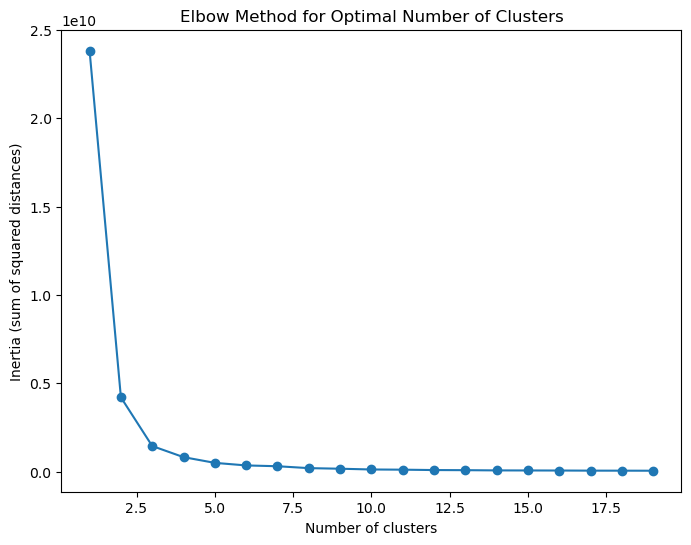

In [65]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming df_health is your DataFrame and DPTO, MUNI are categorical variables

# Step 1: Convert categorical variables (DPTO and MUNI) to numeric using Label Encoding
df_health['DPTO'] = df_health['DPTO'].astype('category').cat.codes
df_health['MUNI'] = df_health['MUNI'].astype('category').cat.codes

# Step 2: Create a feature matrix with DPTO and MUNI
dpto_muni_features = df_health[['DPTO', 'MUNI']]

# Step 3: Elbow Method to find the optimal number of clusters
inertia_values = []
cluster_range = range(1, 20)

# Loop over different numbers of clusters and calculate inertia (sum of squared distances)
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(dpto_muni_features)
    inertia_values.append(kmeans.inertia_)

# Plot the inertia values for different numbers of clusters (Elbow Method)
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (sum of squared distances)')
plt.show()


In [67]:
from kmodes.kmodes import KModes

# Ensure the categorical data is in string format
dpto_muni_features = df_health[['DPTO', 'MUNI']].astype(str)

# Apply K-Modes clustering
kmodes = KModes(n_clusters=4, init='Huang', random_state=42)
clusters = kmodes.fit_predict(dpto_muni_features)

# Add the clusters to the dataframe
df_health['cluster_location'] = clusters

# View the clusters
print(df_health[['DPTO', 'MUNI', 'cluster_location']].head())


   DPTO  MUNI  cluster_location
0    15     0                 0
1    23     0                 1
2     2     0                 2
3    23     0                 1
4     4   486                 0


In [68]:
df_health

,EPS,NUM_IDE,FECHA_NACI,SEXO,DPTO,MUNI,DIAS_COMP,V8,Valor_Neto,DIAS_ESTAN_Neto,...,RENAL_INSUFICIENCIARENALCRONICA,ANOMALIASGENETICASYCONGENITAS,CANCER_TERAPIACANCER,Grupo_Edad,Zona,SEXO_Target_Encoded,DPTO_Target_Encoded,MUNI_Target_Encoded,DPTO_MUNI_Cluster,cluster_location
0,EPS002,7B7119A8-7D83-4DAF-ABC9-D33642AF26FD,1999-05-14,F,15,0,360,B,39054,0,...,0,0,0,3,N,237985.992062,184555.513930,204014.846994,0,0
1,EPS013,D36643BD-6CCC-4608-94D8-6B167B226CB5,1988-08-12,M,23,0,336,C,312012,277,...,0,0,0,5,C,157818.612969,187863.231526,204014.846994,0,1
2,EPS017,919EBF57-FA41-4DD2-AF8A-CB237B47685E,1996-03-15,F,2,0,333,B,14313,0,...,0,0,0,4,C,237985.992062,193542.148208,204014.846994,0,2
3,EPS002,18A7B56B-23F0-4319-BA50-7A497F3FCF18,1998-04-23,M,23,0,84,B,0,0,...,0,0,0,3,C,157818.612969,187863.231526,204014.846994,0,1
4,EPS037,C5BD60C4-B826-4706-9610-E01F83A7C6AB,1990-10-20,F,4,486,180,B,0,0,...,0,0,0,5,N,237985.992062,174371.277517,90492.307692,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996229,EPS005,6A239F21-AE92-4681-BC47-F070C899B960,1980-08-17,M,27,0,360,C,96085,35,...,0,0,0,5,Z,157818.612969,131504.336813,204014.846994,0,0
996230,EPS037,E40491D5-6630-4C46-B927-CF3AEFBA9FD5,1964-04-23,F,23,72,215,B,0,0,...,0,0,0,6,N,237985.992062,187863.231526,177578.753019,4,1
996231,EPS002,0AC1F68B-BB7D-4F45-96B1-C2F11B8CD578,1981-08-18,M,2,0,30,B,0,0,...,0,0,0,5,C,157818.612969,193542.148208,204014.846994,0,2
996232,EPS013,54615F18-FAF2-461E-A323-3201AED98E48,1979-06-21,M,4,0,360,C,70114,0,...,0,0,0,5,N,157818.612969,174371.277517,204014.846994,0,0


In [80]:
df_health = pd.read_csv('/Users/davidmoreno/Library/CloudStorage/OneDrive-SharedLibraries-Universidaddelosandes/David Stiven Romero Grajales - Trabajo de Grado/Trabajo de Grado 1/Base de datos y descripción/Entrenamiento_cronicas_N_Standarized.csv')

#scale the Valor_Neto column
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_health['Valor_Neto'] = scaler.fit_transform(df_health[['Valor_Neto']])


In [81]:
df_health.describe()

,EPS,SEXO,DPTO,MUNI,DIAS_COMP,DIAS_ESTAN_Neto,Edad,SIDA_VIH,TUBERCULOSIS,CANCER_OTROSCANCER,...,ARTRITIS,ARTROSIS,RENAL_OTRA,RENAL_RENALDELARGADURACION,TRANSPLANTE,RENAL_INSUFICIENCIARENALOTRA,RENAL_INSUFICIENCIARENALCRONICA,ANOMALIASGENETICASYCONGENITAS,CANCER_TERAPIACANCER,Valor_Neto
count,638516.000000,638516.000000,638516.000000,638516.000000,638516.000000,638516.000000,638516.000000,638516.000000,638516.000000,638516.000000,...,638516.000000,638516.000000,638516.000000,638516.000000,638516.000000,638516.000000,638516.000000,638516.000000,638516.000000,6.385160e+05
mean,0.000410,-0.000233,-0.000049,0.000025,-0.000122,-0.000019,0.000529,0.001334,0.001074,0.000554,...,0.000127,0.001239,0.001282,-0.000878,-0.000407,-0.000335,0.000745,-0.000390,0.000402,9.584019e-19
std,0.999439,1.000028,0.999632,0.998536,0.999671,0.996055,1.000584,1.013861,1.011215,1.002786,...,1.000594,1.004179,1.011215,0.968748,0.991142,0.996346,1.003998,0.998493,1.013665,1.000001e+00
min,-2.033576,-1.121629,-2.530846,-1.715670,-2.629016,-0.184928,-1.605151,-0.047667,-0.047502,-0.098395,...,-0.105870,-0.144833,-0.056666,-0.014270,-0.023082,-0.045752,-0.092203,-0.127452,-0.014609,-5.199134e-02
25%,-0.475075,-1.121629,-0.491611,-0.015213,-0.613663,-0.184928,-0.779265,-0.047667,-0.047502,-0.098395,...,-0.105870,-0.144833,-0.056666,-0.014270,-0.023082,-0.045752,-0.092203,-0.127452,-0.014609,-4.301098e-02
50%,-0.158973,0.891560,-0.386289,-0.015213,0.705140,-0.159951,-0.099124,-0.047667,-0.047502,-0.098395,...,-0.105870,-0.144833,-0.056666,-0.014270,-0.023082,-0.045752,-0.092203,-0.127452,-0.014609,-2.825178e-02
75%,0.776014,0.891560,0.272430,-0.015213,0.705140,-0.082345,0.678181,-0.047667,-0.047502,-0.098395,...,-0.105870,-0.144833,-0.056666,-0.014270,-0.023082,-0.045752,-0.092203,-0.127452,-0.014609,4.826470e-03
max,1.976790,0.891560,3.935781,11.404395,1.262381,287.117304,4.321797,20.978935,21.051944,10.163165,...,9.445506,6.904487,17.647188,70.076058,43.324188,21.857187,10.845642,7.846093,68.449606,7.920819e+02


In [83]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_health.drop(columns=['Valor_Neto'])
y = df_health['Valor_Neto']

# Split the data (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [84]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Activation, Dropout, Add
from tensorflow.keras.models import Model

def build_complex_model(input_dim):
    # Input layer
    inputs = Input(shape=(input_dim,))
    
    # First hidden layer
    x = Dense(512, kernel_regularizer=l2(0.01))(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.3)(x)
    
    # Second hidden layer with residual connection
    x_res = Dense(512, kernel_regularizer=l2(0.01))(x)
    x_res = BatchNormalization()(x_res)
    x_res = Activation('relu')(x_res)
    x_res = Dropout(0.3)(x_res)
    
    # Adding the first layer and the residual layer
    x = Add()([x, x_res])
    
    # Third hidden layer
    x = Dense(256, kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.3)(x)
    
    # Output layer
    outputs = Dense(1, activation='linear')(x)
    
    # Creating the model
    model = Model(inputs=inputs, outputs=outputs)
    
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
    
    return model


In [88]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1e-6
)
# Build the model
model = build_complex_model(input_dim=X_train.shape[1])

# Model training
history = model.fit(
    X_train, y_train,
    validation_split=0.2,  # 20% of training data used for validation
    epochs=200,
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)



Epoch 1/200
12771/12771 [==============================] - 48s 4ms/step - loss: 0.2830 - mean_absolute_error: 0.0619 - val_loss: 6.1618 - val_mean_absolute_error: 0.0483 - lr: 0.0010
Epoch 2/200
12771/12771 [==============================] - 47s 4ms/step - loss: 0.0219 - mean_absolute_error: 0.0400 - val_loss: 6.1653 - val_mean_absolute_error: 0.0432 - lr: 0.0010
Epoch 3/200
11201/12771 [=========================>....] - ETA: 5s - loss: 0.0198 - mean_absolute_error: 0.0395